# ADP 20회 실기 문제

[![Hits](https://hits.seeyoufarm.com/api/count/incr/badge.svg?url=https%3A%2F%2Fwww.datamanim.com%2Fdataset%2FADPpb%2F00%2Fp2.html&count_bg=%23582382&title_bg=%23555555&icon=&icon_color=%23E7E7E7&title=hits&edge_flat=false)](https://hits.seeyoufarm.com)

```
풀이가 궁금하시다면 단톡방에서 문의주세요!!! 올 때 광고클릭
```

```{attention} 
**[캐글에 업로드된 다른 분들 코드 보러가기](https://www.kaggle.com/datasets/kukuroo3/adp-kr-p2/code)**           
**문제오류, 코드오류 댓글로 피드백주세요**
```

```{attention} 
**1번**    
날씨 온도 예측, 종속변수 :actual(최고온도)    
데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0    
데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv     
temp_1 : 전날 최고온도    
temp_2 : 전전날 최고온도    
friend : 친구의 예측온도    
```

```{admonition} 1-1번
**데이터 확인 및 전처리**     
- 데이터 EDA 수행    
- 결측치를 확인하고 처리 방안에 대해 논의하라    
- 데이터 분할 방법 설명    
- 최종 데이터셋이 적절함을 주장하라    
```

   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
(348, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB
None
         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.000412,0.047651,0.032664,0.120806,0.004529,0.131141,0.127436,0.119786,0.048145
day,NaN,-0.000412,1.000000,-0.046194,-0.000691,-0.021136,-0.021675,-0.021393,-0.030605,-0.013727,0.024592
temp_2,NaN,0.047651,-0.046194,1.000000,0.857800,0.821560,0.805835,0.813134,0.817374,0.819576,0.583758
temp_1,NaN,0.032664,-0.000691,0.857800,1.000000,0.819328,0.877880,0.810672,0.815162,0.815943,0.541282
average,NaN,0.120806,-0.021136,0.821560,0.819328,1.000000,0.848365,0.990340,0.990705,0.994373,0.689278
actual,NaN,0.004529,-0.021675,0.805835,0.877880,0.848365,1.000000,0.838639,0.842135,0.838946,0.569145
forecast_noaa,NaN,0.131141,-0.021393,0.813134,0.810672,0.990340,0.838639,1.000000,0.979863,0.985670,0.669221
forecast_acc,NaN,0.127436,-0.030605,0.817374,0.815162,0.990705,0.842135,0.979863,1.000000,0.983910,0.696054
forecast_under,NaN,0.119786,-0.013727,0.819576,0.815943,0.994373,0.838946,0.985670,0.983910,1.000000,0.691177


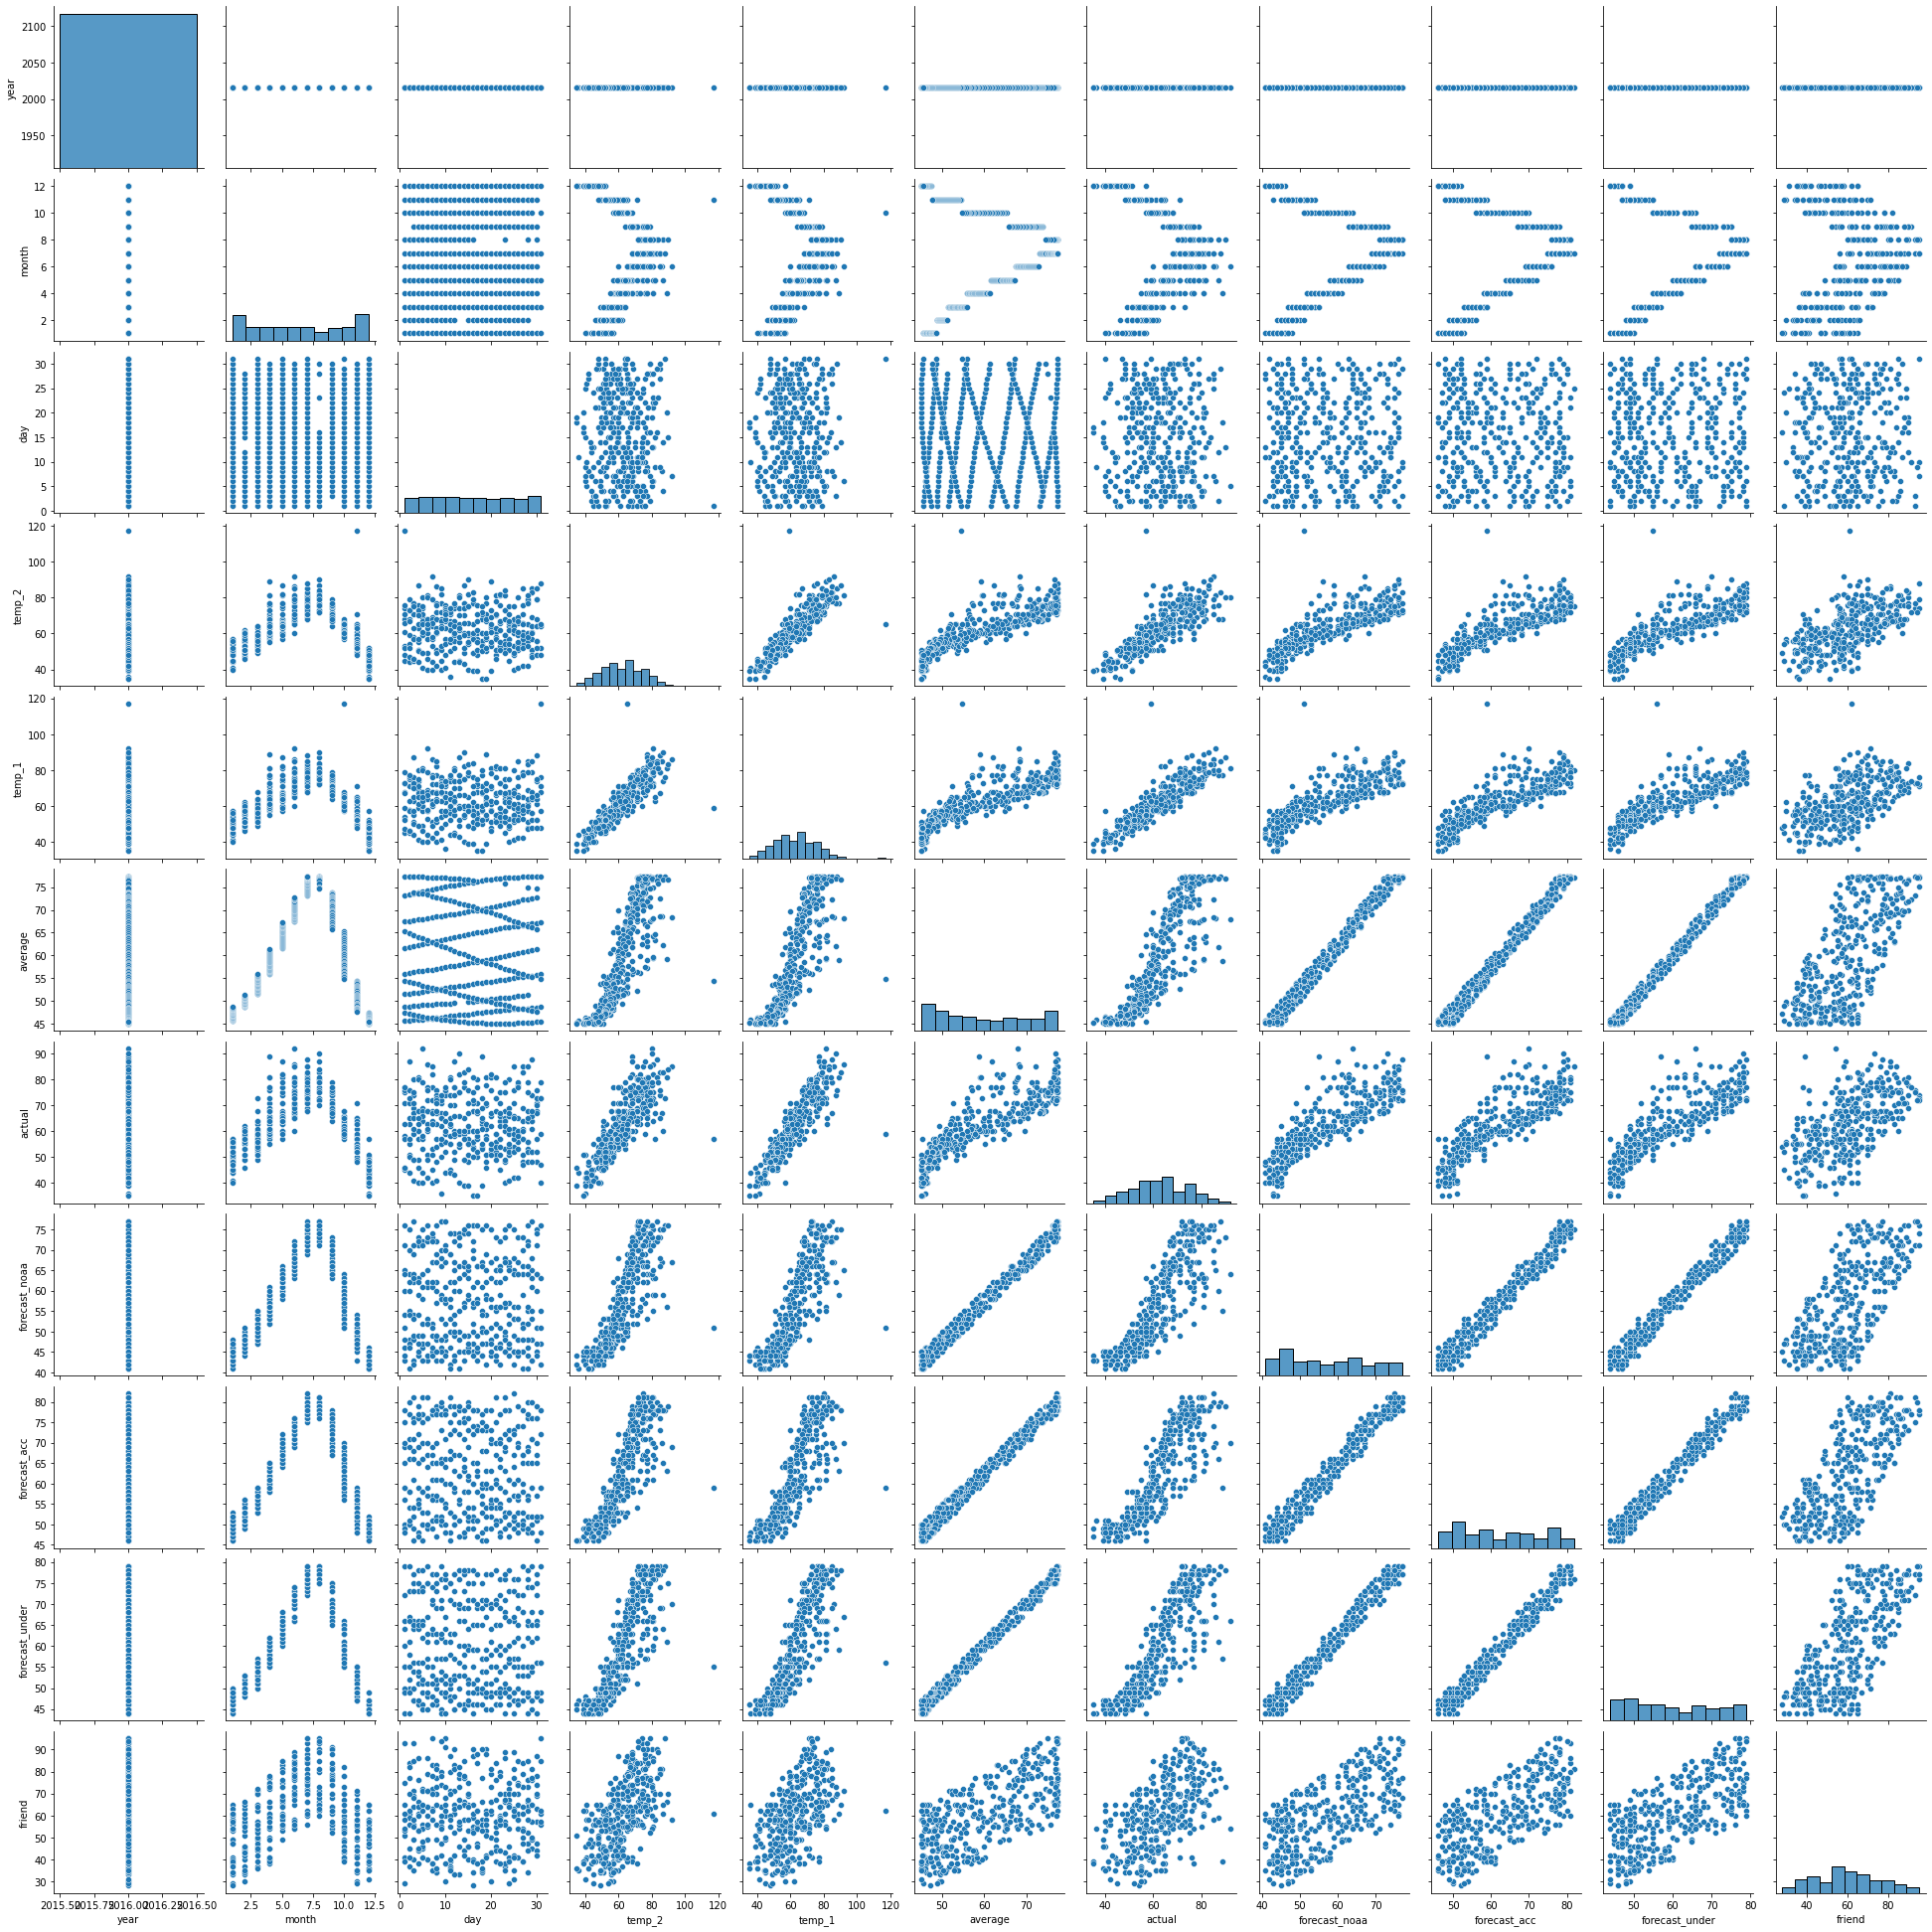


Answer
데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.     
문제 해결시 시계열 방식으로 접근 하지 않을 것이기에 누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.     
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시 하여 처리할 수 있다.     
      
데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.    
    
year, month, day, week, 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.     
train셋과 test셋은 8:2비율로 나눠서 모델링을 진행한다.    
friend 컬럼의 경우 상관관계를 확인했을때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다.     



In [28]:
import pandas as pd 
import seaborn as sns
df =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem1.csv')
print(df.head())  # 상위 5개
print(df.shape)  # 데이터 형태
display(sns.pairplot(df)) # 변수별 상관계쑤
print(df.info()) # 각 컬럼 데이터 타입
print(df.describe()) # 기초 통계량
print(df.isnull().sum()) #결측치 확인


df['date'] =df['year'].astype('str')+'-'+df['month'].astype('str')+'-'+df['day'].astype('str')
df['date'] = pd.to_datetime(df['date'])

v = pd.DataFrame(pd.date_range(start=df['date'].dt.strftime('%Y-%m-%d').min(), end=df['date'].dt.strftime('%Y-%m-%d').max()))[0].dt.strftime('%Y-%m-%d').values
a=set(v) - set(df['date'].dt.strftime('%Y-%m-%d'))
print(a)
len(a)

display(df.corr())

# 데이터 분할
dfd = pd.get_dummies(df)
df_drop = dfd.drop(columns=['year','month','day','friend','date'])

X = df_drop.drop(columns=['actual'])
y = df_drop['actual']

from sklearn.model_selection import train_test_split

X_train,X_test , y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)


plt.show()
print('''
Answer
데이터 상에서 수치 결측치는 존재하지 않는다. 시계열 데이터 관점으로 봤을때, 18일치의 일자 데이터가 결측치로 존재한다.     
문제 해결시 시계열 방식으로 접근 하지 않을 것이기에 누락된 일자에 대해서 따로 결측치 처리를 해주지 않을 것이다.     
시계열 관점으로 해석을 할 경우 누락된 데이터는 평균 보간을 실시 하여 처리할 수 있다.     
      
데이터 시각화 결과 상관관계를 보이는 컬럼들이 확인되며 주기적 경향을 보이는 데이터들이 확인된다.    
    
year, month, day, week, 값은 불필요 컬럼으로 제외한다. week의 경우 원핫인코딩을 진행해서 추가한다.     
train셋과 test셋은 8:2비율로 나눠서 모델링을 진행한다.    
friend 컬럼의 경우 상관관계를 확인했을때 상대적으로 낮은 값을 가지기에 제외하고 학습을 진행한다.     
''')

```{admonition} 1-2번
**Random Forest 모델 적합 및 검증**     
- Random Forest 학습 및 예측 결과 해석    
- 예측 결과 검정 해석, 중요변수 도출        
- 변수 중요성 분석 및 그래프 출력        
```

RandomForest r2_score :  0.8399186619591019
learning time  0.1347370147705078
temp_1 ,average , forecast_acc 순으로 변수 중요도를 확인 할 수 있다


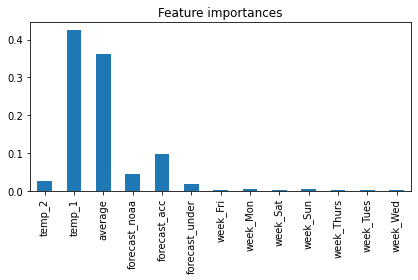

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time
import matplotlib.pyplot as plt

result = []
rf = RandomForestRegressor(random_state=22)
start = time.time()
rf.fit(X_train,y_train)
end = time.time()

pred = rf.predict(X_test)
print('RandomForest r2_score : ',r2_score(y_test,pred))
print('learning time ',end-start)
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

print('temp_1 ,average , forecast_acc 순으로 변수 중요도를 확인 할 수 있다')

result.append([end-start,r2_score(y_test,pred)])

```{admonition} 1-3번
**SVM(Support Vector Machine) 모델 적합 및 검증**     
- svm 학습 및 예측 결과 해석     
- 예측 결과 검정 해석, 중요변수 도출            
- 변수 중요성 분석 및 그래프 출력        
```

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import time
svm = SVR()

start = time.time()
svm.fit(X_train,y_train)
end = time.time()

pred = svm.predict(X_test)
print('svm r2_score : ',r2_score(y_test,pred))
print('learning time ',end-start)
print('svm은 변수 중요도를 따로 추출 할 수 없다. r2_score의 경우 RandomForest에 비해 낮다')


result.append([end-start,r2_score(y_test,pred)])

svm r2_score :  0.8138036782618503
learning time  0.008105278015136719
svm은 변수 중요도를 따로 추출 할 수 없다. r2_score의 경우 RandomForest에 비해 낮다


```{admonition} 1-4번
**모델 비교 및 향후 개선 방향 도출**     
- Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택     
- 두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?                 
- 모델링 관련 추후 개선 방향 제시             
```

In [9]:
result_df = pd.DataFrame(result,columns = ['learning time','r2_score'])
result_df.index = ['RandomForest','Svm']
display(result_df)

print('''
파라미터 튜닝을 제외한 기본모델의 경우 모델학습시간은 랜덤포레스트가 svm에 비해 더 오래 걸린다.      
test셋에 대한 모델 r2score는 랜덤포레스트가 더 높다.    
모델 학습시간을 중점둔다면 svm이 더 유리하다. 하지만 랜덤포레스트의 경우 변수중요도를 확인 할 수 있고, 정확도가 더 높기 때문에    
최종적으로는 랜덤포레스트를 선택한다. 
''')

,learning time,r2_score
RandomForest,0.134737,0.839919
Svm,0.008105,0.813804



파라미터 튜닝을 제외한 기본모델의 경우 모델학습시간은 랜덤포레스트가 svm에 비해 더 오래 걸린다.      
test셋에 대한 모델 r2score는 랜덤포레스트가 더 높다.    
모델 학습시간을 중점둔다면 svm이 더 유리하다. 하지만 랜덤포레스트의 경우 변수중요도를 확인 할 수 있고, 정확도가 더 높기 때문에    
최종적으로는 랜덤포레스트를 선택한다. 



```{attention} 
**2번**    
5분간격의 가구별 전력 사용량의 데이터       
데이터 출처 : 자체생성  
데이터 경로 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem2.csv    
```

In [10]:
import matplotlib.pyplot as plt
ttt= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem2.csv')

```{admonition} 2-1번
**데이터 전처리**       
각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.     
군집화를 위한 데이터 구성의 이유를 설명하라     
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)            
```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/20/problem2.png?raw=true)

In [12]:
tt = ttt.sort_values(['houseCode','date']).reset_index(drop=True)
tt['date'] = pd.to_datetime(tt['date'])
tg = tt.groupby(['houseCode']).resample('15min', on='date')['power consumption'].sum().reset_index()
tg = tg.rename(columns= {'power consumption':'power consumption sum'})
tgg = tg.copy()

tgg['c'] =tgg['houseCode'].str[-2:].astype('int')
tgg['d'] =tgg['date'].dt.hour
tgg['e'] =tgg['date'].dt.day

from sklearn.cluster import KMeans 

# k-means clustering 실행
kmeans = KMeans(n_clusters=5)
kmeans.fit(tgg.iloc[:,2:].values)

tg['Cluster'] =kmeans.labels_

tg

,houseCode,date,power consumption sum,Cluster
0,house_00,2050-01-01 00:00:00,136.249952,4
1,house_00,2050-01-01 00:15:00,98.283387,4
2,house_00,2050-01-01 00:30:00,53.967679,4
3,house_00,2050-01-01 00:45:00,204.821270,1
4,house_00,2050-01-01 01:00:00,150.760786,1
...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,0
133916,house_44,2050-01-31 23:00:00,463.419892,3
133917,house_44,2050-01-31 23:15:00,369.930740,0
133918,house_44,2050-01-31 23:30:00,237.713030,2


```{admonition} 2-2번
**히트맵 시각화**       
2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라    
(수치는 동일하지 않을 수 있음 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환 됐는지 주로 확인)                
```

![image](https://github.com/Datamanim/datarepo/blob/main/adp/20/problem2_Example.png?raw=true)

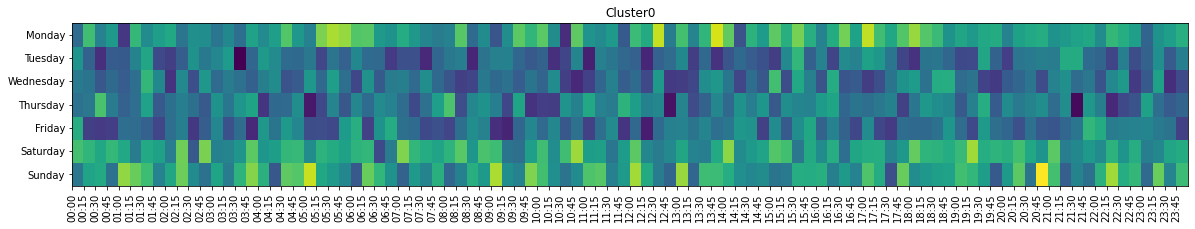

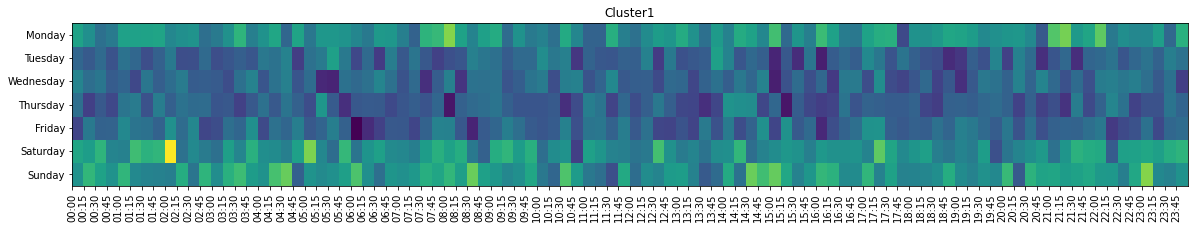

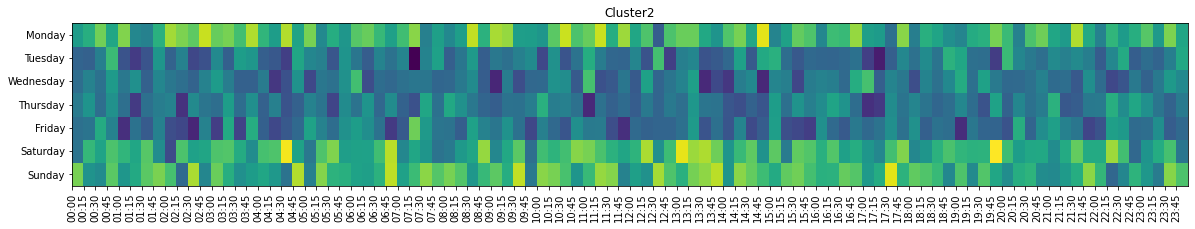

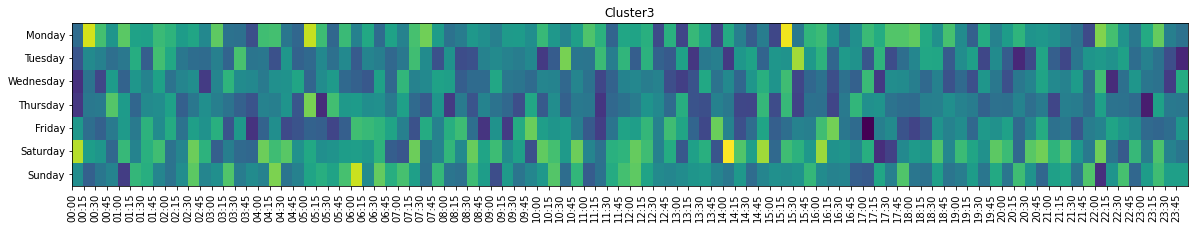

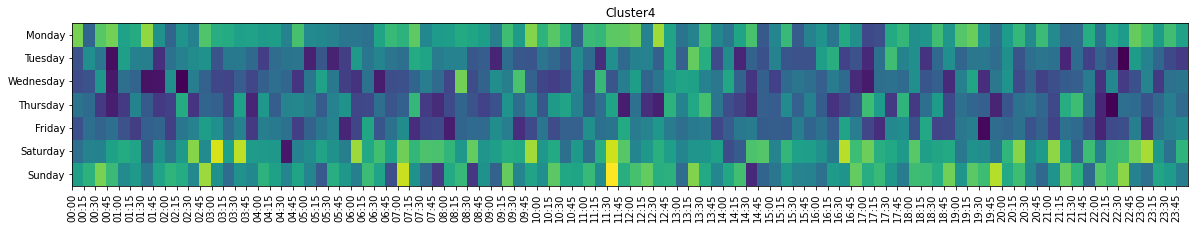

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

tg['day'] = tg.date.dt.day_name()

tg['min'] = tg.date.dt.strftime('%H:%M')

pv = tg.groupby(['Cluster','day','min'],as_index=False).sum()
for v in range(5):
    plt.figure(figsize=(20,3))
    target = pv.loc[pv.Cluster==v]
    pvt = target.pivot(index='day',columns='min',values='power consumption sum').reindex(['Sunday','Saturday','Friday','Thursday','Wednesday','Tuesday','Monday'])
    plt.pcolor(pvt)
    plt.title('Cluster'+str(v))
    plt.xticks(range(len(pvt.columns)),pvt.columns,rotation=90)
    plt.yticks(np.arange(len(pvt.index))+0.5,pvt.index)

```{attention} 
**3번**    
태양광 데이터       
데이터 출처 : https://www.kaggle.com/cheedcheed/california-renewable-production-20102018     
데이터 경로 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p2/problem3.csv     
예측 변수 :SOLAR PV     
```

In [25]:
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/20/problem3.csv')
df.head()

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


```{admonition} 3-1번
**데이터셋 분할 및 결과 검증**       
- 데이터셋 7:3 분할         
- 데이터 전처리 및 예측 모델 생성          
- 모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라   
- 정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.  
분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.      
- 최종 결과 제출 : 소수점 3째자리 반올림
```

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor


df = df.drop(columns =['SOLAR'])
def suntimeChecker(x):
    if pd.to_datetime(x).hour in list(range(6,18)):
        return 1
    else:
        return 0

df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df['suntime'] = df['TIMESTAMP'].apply(suntimeChecker)

X = df.drop(columns=['TIMESTAMP','Hour','SOLAR PV'])
y= df['SOLAR PV']

X_train,X_test ,y_train,y_test = train_test_split(X,y,random_state =2 , test_size =0.3)

rf =RandomForestRegressor()
rf.fit(X_train,y_train)

pred = rf.predict(X_test)

def getEachAccuracy(y_true,y_pred):
    if y_true ==0:
        return 0.5
    if y_pred ==0:
        return 0.5
    
    if y_true > y_pred:
        return 1-(y_pred/y_true)
    else:
        return 1-(y_true/y_pred)
    
acc = []
for i,v in enumerate(y_test):
    acc.append(getEachAccuracy(v,pred[i]))
    
# 데이터 전처리의 경우 날짜 컬럼을 제외하고, nan값만 있는 컬럼을 제외했다. 
# 해가 존재하는시각을 (06~17시)로 설정해서 파생변수를 만들어줬다
# 정확도의 경우 아래와 같다

print('RMSE',round(mean_squared_error(y_test, pred)**0.5,3))
print('r2',round(r2_score(y_test, pred),3))
print('acc',1- round(sum(acc)/len(acc),3))

RMSE 702.12
r2 0.914
acc 0.623
